# 1. Loading the data

Here we assume that we already have the errors stored as numpy array for all the three schemes considered. Note that the dataset used here are simulated assuming ideal situation (no noise, sufficiently dense data points at regular interval).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('errors_T1_h01.pkl', 'rb') as file:
    errors01 = pickle.load(file)

with open('errors_T1_h008.pkl', 'rb') as file:
    errors008 = pickle.load(file)
    
with open('errors_T1_h005.pkl', 'rb') as file:
    errors005 = pickle.load(file)

with open('errors_T1_h004.pkl', 'rb') as file:
    errors005 = pickle.load(file)
    
with open('errors_T1_h002.pkl', 'rb') as file:
    errors002 = pickle.load(file)

#grid_points = np.arange(0, 1, 0.01)
grid_sizes = [100, 125, 200, 250, 500]
step_sizes = [1/x for x in grid_sizes]
print(step_sizes)

[0.01, 0.008, 0.005, 0.004, 0.002]


# 2. Plotting the data

Here we would like to summarize the numerical results to analyze the convergence properties of the three LMM schemes for learning dynamics from data.

In [ ]:
scheme = 'Adams Bashforth'
plt.title('L1-norm of difference between predicted and true dynamics for ' + scheme)


plt.yscale('log')
plt.plot(grid_points, errors01['AB1'], label='M = 1')
plt.plot(grid_points, errors01['AB2'], label='M = 2')
plt.plot(grid_points, errors01['AB3'], label='M = 3')
plt.plot(grid_points, errors01['AB4'], label='M = 4')
plt.plot(grid_points, errors01['AB5'], label='M = 5')
plt.legend()


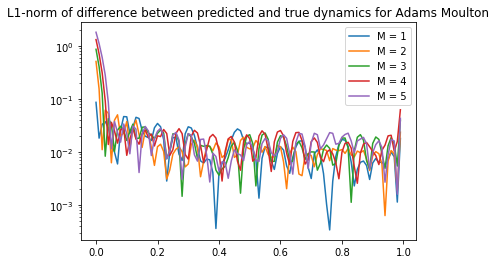

In [12]:
scheme = 'Adams Moulton'
plt.title('L1-norm of difference between predicted and true dynamics for ' + scheme)
plt.yscale('log')

plt.plot(grid_points, errors['AM1'], label='M = 1')
plt.plot(grid_points, errors['AM2'], label='M = 2')
plt.plot(grid_points, errors['AM3'], label='M = 3')
plt.plot(grid_points, errors['AM4'], label='M = 4')
plt.plot(grid_points, errors['AM5'], label='M = 5')
plt.legend()

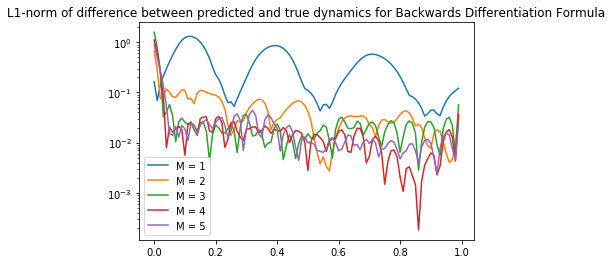

In [13]:
scheme = 'Backwards Differentiation Formula'
plt.title('L1-norm of difference between predicted and true dynamics for ' + scheme)
plt.yscale('log')
plt.plot(grid_points, errors['BDF1'], label='M = 1')
plt.plot(grid_points, errors['BDF2'], label='M = 2')
plt.plot(grid_points, errors['BDF3'], label='M = 3')
plt.plot(grid_points, errors['BDF4'], label='M = 4')
plt.plot(grid_points, errors['BDF5'], label='M = 5')
plt.legend()

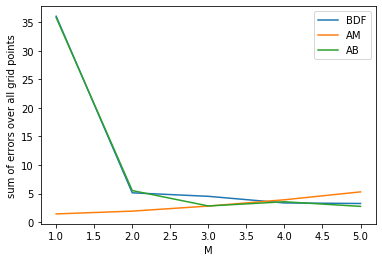

In [6]:
# make sure all errors are greater than zero

bdf = [np.sum(errors['BDF' + str(i)]) for i in range(1, 6)]
ab = [np.sum(errors['AB' + str(i)]) for i in range(1, 6)]
am = [np.sum(errors['AM' + str(i)]) for i in range(1, 6)]

plt.plot(range(1, 6), bdf, label='BDF')
plt.plot(range(1, 6), am, label='AM')
plt.plot(range(1, 6), ab, label='AB')
plt.xlabel('M')
plt.ylabel('sum of errors over all grid points')
plt.legend()

# 4. Recontruction of long-time dynamics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

time_points = np.arange(0,25,0.01)
with open('test_pred.npy', 'rb') as file:
    test_pred = np.load(file)

def f(x,t):
    """
    Return the derivatives (RHS of the ODE)
    This is a linear system with the form f = A x
    Args:
    x -- a 2 x 1 vector of measurements
    """
    A = np.array([[-0.1, 2], [-2,-0.1]]) # 2 x 2

    return np.ravel(np.matmul(A,x.reshape(-1, 1)**3))

# create time points
time_points = np.arange(0,25,0.01)

# specify initial conditions
x0 = np.array([2,0])

simulated_x = odeint(f, x0, time_points)

Text(0.5, 1.0, 'Trajectories of 2D Cubic Harmonic Oscillator')

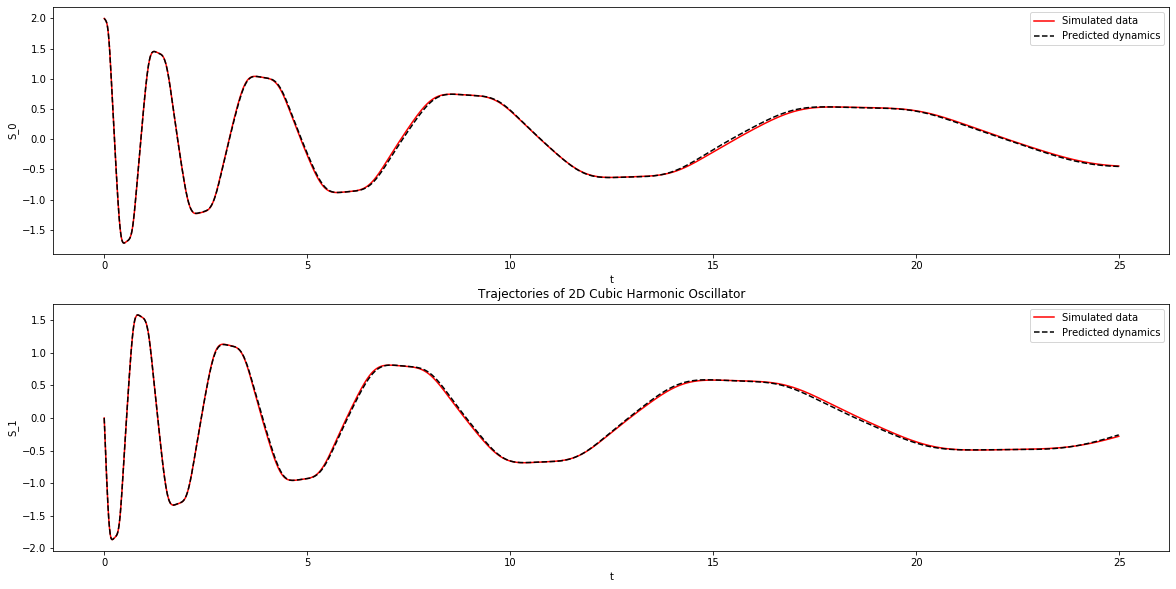

In [3]:

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Cubic Harmonic Oscillator')

Text(0.5, 1.0, 'Phase plane of 2D Cubic Harmonic Oscillator')

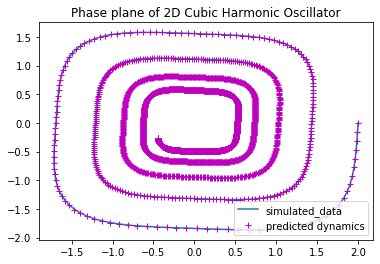

In [4]:
# Phase plane

plt.plot(simulated_x[:,0], simulated_x[:,1], label='simulated_data')
plt.legend()
plt.plot(test_pred[:,0], test_pred[:,1], 'm+', label='predicted dynamics')
plt.legend()
plt.title('Phase plane of 2D Cubic Harmonic Oscillator')